# 01 - Data Loading & Overview

---

## Problem Statement

### Business Context
**IEEE-CIS Fraud Detection** is a Kaggle competition aimed at detecting fraudulent transactions in e-commerce. The dataset is provided by **Vesta Corporation**, one of the world's largest payment processors.

### Problem Definition
**Objective**: Predict the probability that a transaction is **fraudulent** based on transaction data and identity information.

- **Input**: Transaction data (amount, product, card info, device, etc.)
- **Output**: Fraud probability (0.0 - 1.0)
- **Type**: Binary Classification (Supervised Learning)
- **Metric**: ROC-AUC Score

### Business Impact
| Scenario | Impact |
|----------|--------|
| **False Negative** (Missed Fraud) | Financial loss, customer trust damage |
| **False Positive** (False Alarm) | Customer friction, declined legitimate transactions |
| **True Positive** (Caught Fraud) | Saved money, protected customer |

### Challenges
1. **Highly Imbalanced**: Only approximately 3.5% of transactions are fraudulent
2. **High Dimensionality**: 400+ features
3. **Many Missing Values**: Identity data has only 25% coverage
4. **Anonymous Features**: V1-V339 have no description
5. **Temporal Data**: TransactionDT is in seconds, not datetime format

### Success Criteria
- **Kaggle Leaderboard**: AUC > 0.90 (bronze), > 0.93 (silver), > 0.95 (gold)
- **Business**: Minimize fraud loss while maintaining good customer experience

---

## Notebook Objectives
- Understand the structure of the IEEE Fraud Detection dataset
- Load data efficiently (using parquet format)
- Explore basic statistics
- Understand column groups and feature categories

---

## IEEE-CIS Fraud Detection Dataset

This dataset is provided by Vesta Corporation, a payment processing company.

**Files:**
- `train_transaction.parquet` - Training transactions (approximately 590K rows)
- `train_identity.parquet` - Identity information (approximately 144K rows, only 25% of transactions)
- `test_transaction.parquet` - Test transactions
- `test_identity.parquet` - Test identity information

**Target Variable:**
- `isFraud` = 1 if the transaction is fraudulent, 0 otherwise

**Note**: Not all transactions have corresponding identity information. The identity table covers only about 25% of total transactions, as this data is optional and depends on the payment method and verification process used.

In [2]:
## IMPORT LIBRARY
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

#setting
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_row',100)
plt.style.use('seaborn-v0_8-whitegrid')

#DATA PATH
DATA_DIR = Path('../data/raw')

print("succes")

succes


## LOAD DATASET

In [3]:
# load transcation data

train_trans = pd.read_parquet(DATA_DIR /'train_transaction.parquet')

train_ident = pd.read_parquet(DATA_DIR / 'train_identity.parquet')

print("Data loaded")
print(f'Transaction : {train_trans.shape[0]:,} rows x {train_trans.shape[1]:,} columns')
print(f'Transaction : {train_ident.shape[0]:,} rows x {train_ident.shape[1]:,} columns')

Data loaded
Transaction : 590,540 rows x 394 columns
Transaction : 144,233 rows x 41 columns


In [4]:
# memory usage 
def get_memory(df):
    """Get dataframe memory usage in MB"""
    return df.memory_usage(deep=True).sum() / 1024**2

trans_mem = get_memory(train_trans)
ident_mem = get_memory(train_ident)

print("memory usage : ")
print(f"Transaction : {trans_mem:.1f} MB")
print(f"Identity : {ident_mem:.1f}MB")
print(f"Total : {trans_mem + ident_mem:.1f}MB")

memory usage : 
Transaction : 861.1 MB
Identity : 16.2MB
Total : 877.3MB


## DATA OVERVIEW

In [5]:
# TRANSCARION DATA
train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# COLUMNS GROUPS

columns = train_trans.columns.tolist()

# identify columns groups
col_groups = {
    'Target & ID' : ['TransactionID', 'IsFraud', 'TransactionDT', 'TransactionAmt'],
    'Product' : [c for c in columns if c.startswith('ProductCD')],
    'Card' : [c for c in columns if c.startswith('card')],
    'Address' : ['addr1', 'addr2', 'dist1', 'dist1'],
    'Email' : [c for c in columns if 'email' in c.lower()],
    'Count' : [c for c in columns if c.startswith('C') and c[1:].isdigit()],
    'TimeDelta' : [c for c in columns if c.startswith('D') and c[1:].isdigit()],
    'Match' : [c for c in columns if c.startswith('M') and c[1:].isdigit()],
    'Vesta' : [c for c in columns if c.startswith('V') and c[1:].isdigit()]    
}

print("Columns groups:")
for group, cols in col_groups.items():
    print(f'   {group}: {len(cols)} columns')

Columns groups:
   Target & ID: 4 columns
   Product: 1 columns
   Card: 6 columns
   Address: 4 columns
   Email: 2 columns
   Count: 14 columns
   TimeDelta: 15 columns
   Match: 9 columns
   Vesta: 339 columns


Target Distribution
Not froud (0) : 569,877 (96.50%)
Fraud (1) 20,663 (96.50%)


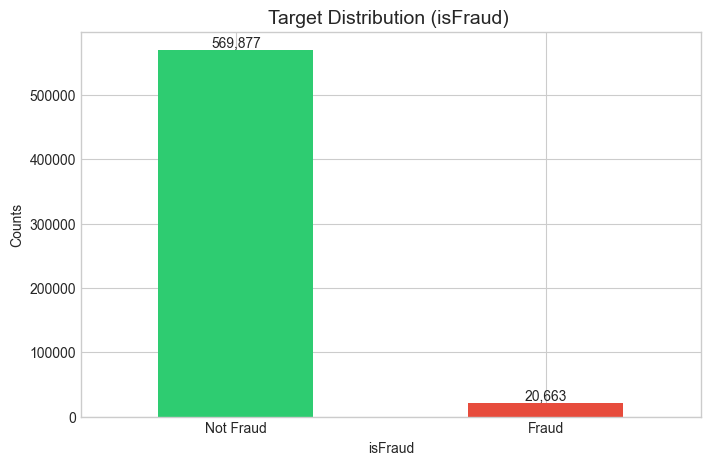

In [6]:
# TARGET DISTRIBUTION

fraud_counts = train_trans['isFraud'].value_counts()
fraud_pct = train_trans['isFraud'].mean() * 100

print('Target Distribution')
print(f'Not froud (0) : {fraud_counts[0]:,} ({100 - fraud_pct:.2f}%)')
print(f'Fraud (1) {fraud_counts[1]:,} ({100 - fraud_pct:.2f}%)')

# visualize
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#2ecc71', '#e74c3c']
fraud_counts.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Target Distribution (isFraud) ', fontsize=14)
ax.set_xlabel('isFraud')
ax.set_ylabel('Counts')
ax.set_xticklabels(['Not Fraud', 'Fraud'], rotation=0)

for i, v in enumerate(fraud_counts):
    ax.text(i, v + 5000, f'{v:,}', ha='center')

In [7]:
# DATA TYPES 
dtype_counts = train_trans.dtypes.value_counts()

print('Data types : ')
for dtype, count in dtype_counts.items():
    print(f'{dtype} : {count} coulms')

Data types : 
float32 : 376 coulms
category : 8 coulms
int32 : 2 coulms
int8 : 1 coulms
category : 1 coulms
category : 1 coulms
int16 : 1 coulms
category : 1 coulms
category : 1 coulms
category : 1 coulms
category : 1 coulms


In [13]:
## IDENTITY DATA 
train_ident.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
## MERGE ANALYSIS

trans_ids = set(train_trans['TransactionID'])
ident_ids = set(train_ident['TransactionID'])

matching = trans_ids & ident_ids
trans_only = trans_ids - ident_ids

coverage = len(matching) / len(trans_ids) * 100

print('merge analysis :')
print(f'transaction : {len(trans_ids):,}')
print(f'Identities : {len(ident_ids):,}')
print(f'Matching: {len(matching):,} ({coverage:.1f}%)')
print(f'Trans w/o ID : {len(trans_only):,}')

merge analysis :
transaction : 590,540
Identities : 144,233
Matching: 144,233 (24.4%)
Trans w/o ID : 446,307


In [11]:
# merge data
train = pd.merge(
    train_trans,
    train_ident,
    on='TransactionID',
    how='left'
)

print(f'Merge Data : {train.shape[0]:,} rows x {train.shape[1]:,} columns')
print(f"Memoey : {get_memory(train):.1f} MB")

Merge Data : 590,540 rows x 434 columns
Memoey : 924.4 MB


## MISSING VALUE

In [15]:
missing = train.isnull().sum()
missing_pct = (missing / len(train)* 100).sort_values(ascending=False)

# column with missing value
cols_with_missing = missing_pct[missing_pct > 0]

print(f'Missing Value')
print(f'Column with missing : {len(cols_with_missing)} / {len(train.columns)}')
print(missing_pct.head().to_string())

Missing Value
Column with missing : 414 / 434
id_24    99.196159
id_25    99.130965
id_07    99.127070
id_08    99.127070
id_21    99.126393


Missing Value Categories:
50-90% Missing : 202 columns
10-50% Missing : 108 columns
10% Missing : 92 columns
No Missing : 20 columns
> 90% missing : 12 columns


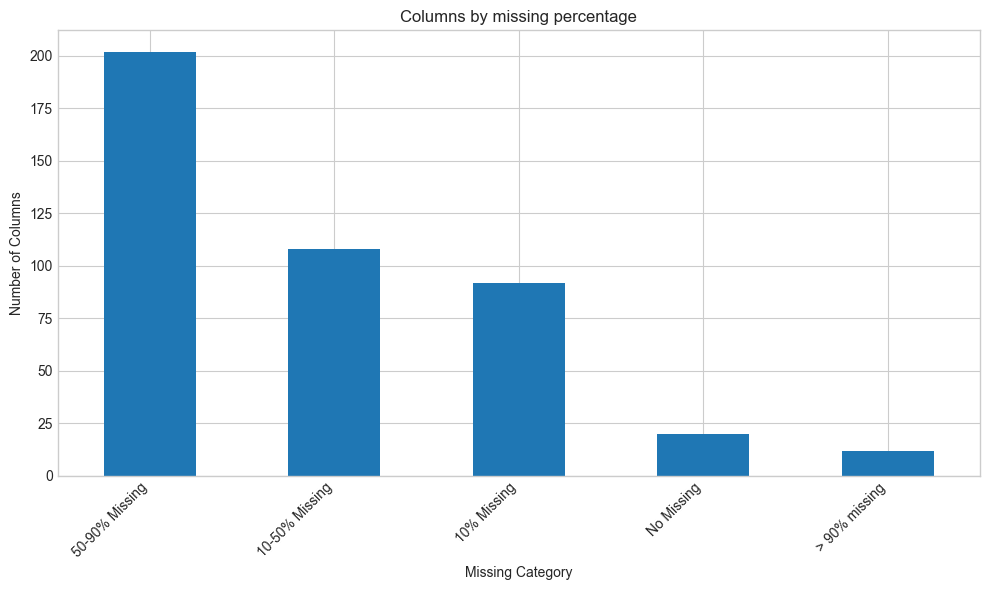

In [24]:
# missing value visualization

# get columns grouped by missing percentage
def categorize_missing(pct):
    if pct == 0:
        return 'No Missing'
    elif pct < 10:
        return '10% Missing'
    elif pct < 50:
        return '10-50% Missing'
    elif pct < 90:
        return '50-90% Missing'
    else:
        return '> 90% missing'

missing_categories = missing_pct.apply(categorize_missing).value_counts()

print('Missing Value Categories:')
for cat, count in missing_categories.items():
    print(f'{cat} : {count} columns')

# visualize
fig, ax = plt.subplots(figsize=(10,6))
missing_categories.plot(kind='bar', ax=ax)
ax.set_title('Columns by missing percentage')
ax.set_xlabel('Missing Category')
ax.set_ylabel('Number of Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## FEATURE OVERVIEW

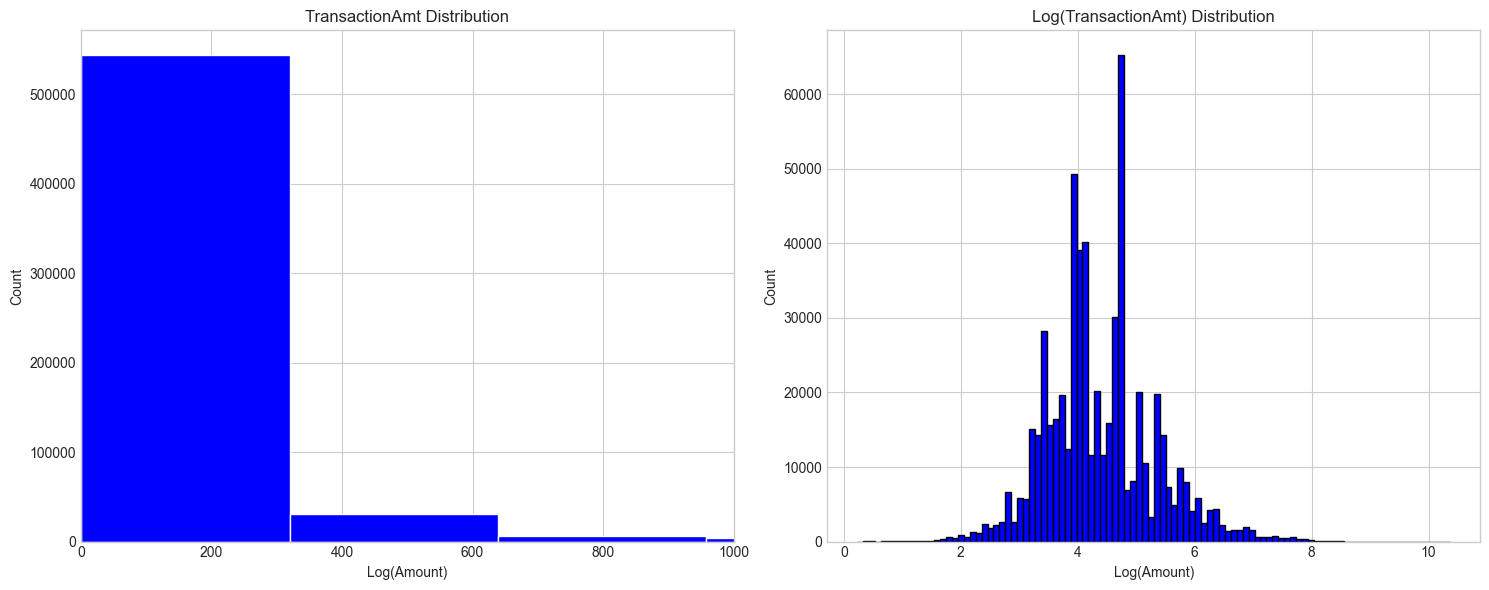

In [42]:
# TRANSACTION AMOUNT
train['TransactionAmt'].describe().round(2)

# visualize
fig, axes = plt.subplots(1, 2,figsize=(15,6))

# original distribution 
axes[0].hist(train['TransactionAmt'], bins=100, color='blue', edgecolor ='white')
axes[0].set_title('TransactionAmt Distribution')
axes[0].set_xlabel('Log(Amount)')
axes[0].set_ylabel('Count')
axes[0].set_xlim(0,1000)

# log distribution
axes[1].hist(np.log1p(train['TransactionAmt']), bins=100, color='blue', edgecolor='black')
axes[1].set_title('Log(TransactionAmt) Distribution')
axes[1].set_xlabel('Log(Amount)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

            count        mean         std    min        25%   50%    75%  \
isFraud                                                                    
0        569877.0  134.511658  239.395081  0.251  43.970001  68.5  120.0   
1         20663.0  149.244781  232.212158  0.292  35.043999  75.0  161.0   

                  max  
isFraud                
0        31937.390625  
1         5191.000000  


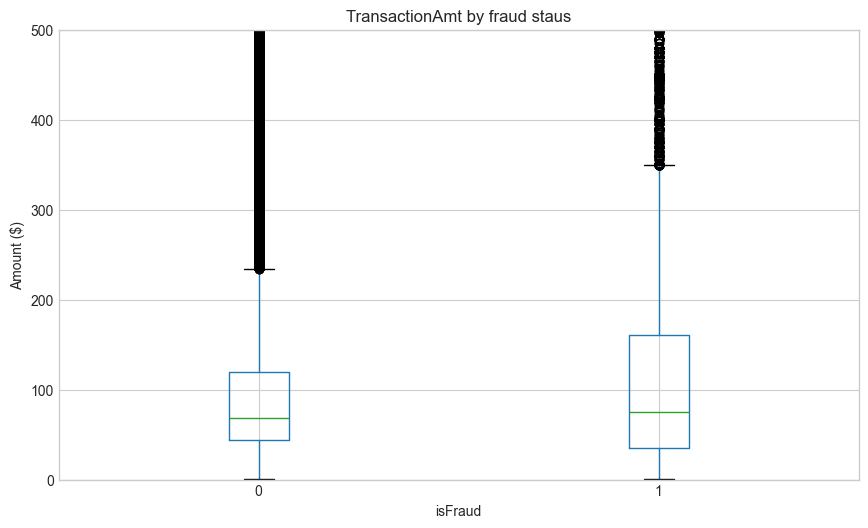

In [52]:
# AMOUNT BY FRAUD STAUIS

fraud_amt = train.groupby('isFraud')['TransactionAmt'].describe()
print(fraud_amt)

# visualisize
fig, ax = plt.subplots(figsize=(10,6))
train.boxplot(column='TransactionAmt', by='isFraud', ax=ax)
ax.set_title('TransactionAmt by fraud staus')
ax.set_xlabel('isFraud')
ax.set_ylabel('Amount ($)')
ax.set_ylim(0,500)
plt.suptitle('')
plt.show()

ProductCD Distribution:
ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

Fraud Rate by ProductCD:
ProductCD
C    0.116873
H    0.047662
R    0.037826
S    0.058996
W    0.020399
Name: isFraud, dtype: float64


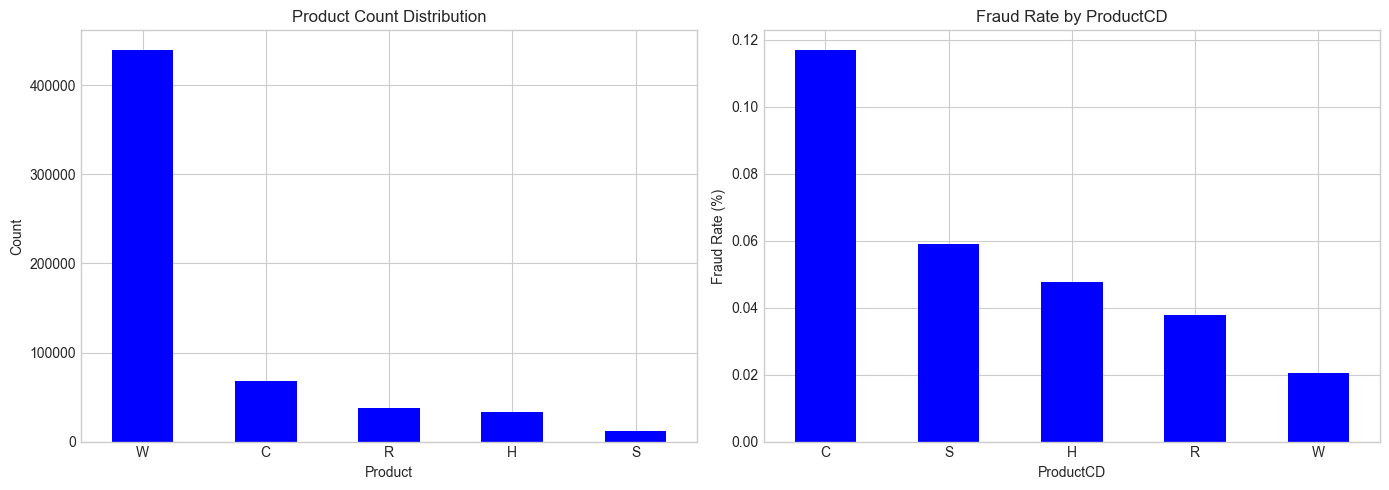

In [66]:
# product catehory

product_counts = train['ProductCD'].value_counts()
product_fraud = train.groupby('ProductCD')['isFraud'].mean()

print('ProductCD Distribution:')
print(product_counts)
print('\nFraud Rate by ProductCD:')
print(product_fraud)


# visualize
fig, axes = plt.subplots(1,2,figsize=(14,5))

# count
product_counts.plot(kind='bar', color='blue', ax=axes[0])
axes[0].set_title('Product Count Distribution')
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Fraude rate
product_fraud.sort_values(ascending=False).plot(kind='bar', color='blue', ax=axes[1])
axes[1].set_title('Fraud Rate by ProductCD')
axes[1].set_xlabel('ProductCD')
axes[1].set_ylabel('Fraud Rate (%)')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [69]:
# save merged data
output_path = Path('../data/interim/train_merged.parquet')
output_path.parent.mkdir(parents=True, exist_ok=True)

train.to_path(output_path, index=False)

print(f'saved merge data to {output_path}')
print(f'size {output_path.stat().st_size / 1024**2:.1f}MB')

AttributeError: 'DataFrame' object has no attribute 'to_path'